# Homework 5
## Mengxiang Jiang

The majority of the code here comes from the [Companion Jupyter notebooks for the book "Deep Learning with Python"](https://github.com/fchollet/deep-learning-with-python-notebooks) by François Chollet, specifically chapter 4.
If the code comes from somewhere else it will have a source linked to the original.\
[Video Link](https://youtu.be/gmHJk2IpYro)

## Classifying movie reviews: A binary classification example
### The IMDB dataset
**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

**Decoding reviews back to text**

In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### Preparing the data
**Encoding the integer sequences via multi-hot encoding**

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model
**Model definition**

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [5]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach
**Setting aside a validation set**

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [7]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
print(history_dict.keys())

Epoch 1/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5450 - accuracy: 0.7685 - val_loss: 0.4245 - val_accuracy: 0.8466
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3400 - accuracy: 0.8932 - val_loss: 0.3244 - val_accuracy: 0.8795
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2555 - accuracy: 0.9141 - val_loss: 0.3033 - val_accuracy: 0.8786
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2060 - accuracy: 0.9308 - val_loss: 0.2793 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1721 - accuracy: 0.9439 - val_loss: 0.2779 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1476 - accuracy: 0.9523 - val_loss: 0.2856 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1260 - accuracy: 0.9615 - val_loss: 0.2928 - val_accuracy: 0.8858
Epoch 8/20
30/30 

**Plotting the training and validation loss**

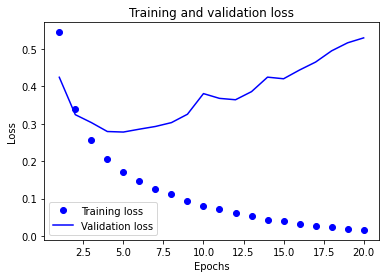

In [8]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

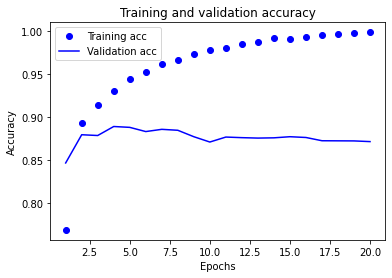

In [9]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**4.1.6.1a Retraining a model with one representation layer**

In [10]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history

Epoch 1/20
30/30 [==============================] - 1s 17ms/step - loss: 0.5288 - accuracy: 0.7834 - val_loss: 0.4276 - val_accuracy: 0.8446
Epoch 2/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3543 - accuracy: 0.8877 - val_loss: 0.3415 - val_accuracy: 0.8788
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2811 - accuracy: 0.9096 - val_loss: 0.3080 - val_accuracy: 0.8847
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2363 - accuracy: 0.9240 - val_loss: 0.2886 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 0s 7ms/step - loss: 0.2054 - accuracy: 0.9340 - val_loss: 0.2939 - val_accuracy: 0.8814
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1833 - accuracy: 0.9411 - val_loss: 0.2812 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1654 - accuracy: 0.9493 - val_loss: 0.2776 - val_accuracy: 0.8877
Epoch 8/20
30/30

**accuracy plot**

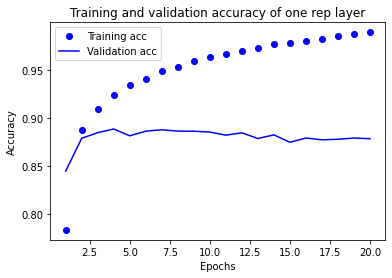

In [11]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy of one rep layer")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**4.1.6.1b Retraining a model with three representation layers**

In [12]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history

Epoch 1/20
30/30 [==============================] - 1s 16ms/step - loss: 0.5324 - accuracy: 0.7661 - val_loss: 0.4129 - val_accuracy: 0.8391
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3152 - accuracy: 0.8957 - val_loss: 0.3043 - val_accuracy: 0.8848
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2370 - accuracy: 0.9175 - val_loss: 0.2904 - val_accuracy: 0.8841
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1817 - accuracy: 0.9376 - val_loss: 0.3127 - val_accuracy: 0.8735
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1542 - accuracy: 0.9467 - val_loss: 0.2981 - val_accuracy: 0.8842
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1259 - accuracy: 0.9594 - val_loss: 0.2957 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1055 - accuracy: 0.9669 - val_loss: 0.3141 - val_accuracy: 0.8824
Epoch 8/20
30/30

**accuracy plot**

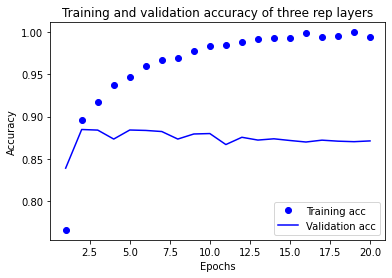

In [13]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy of three rep layers")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()